<a href="https://colab.research.google.com/github/Yuchen686/parking-spaces/blob/main/parking_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exponential distributions

Max parking spaces required: 3409
Min parking spaces required: 1
Average parking spaces required: 16.75


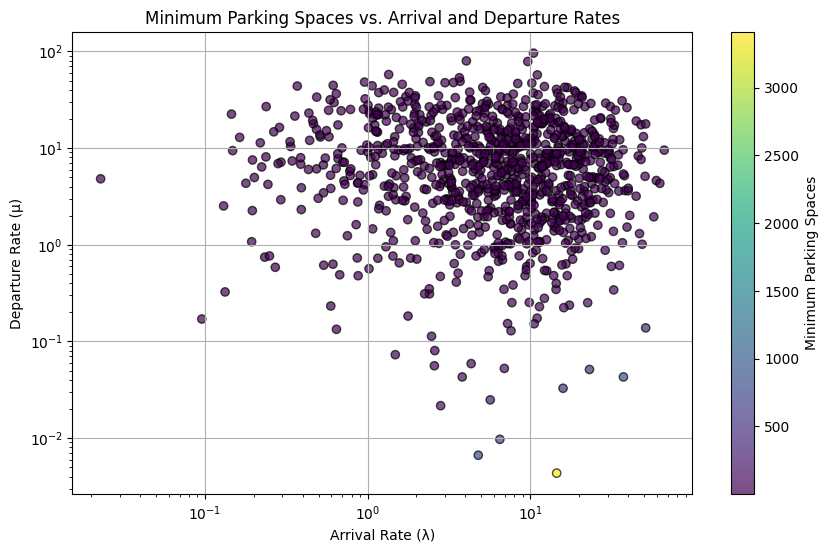

In [1]:
import numpy as np
from math import factorial, log, exp
import matplotlib.pyplot as plt

from math import log, exp

def erlang_b(lambda_rate, mu_rate, num_servers):
    '''
    Calculate the probability that all service facilities are occupied under the M/M/c/c model
    (Erlang-B formula), using logarithms for numerical stability.
    Parameters:
    - lambda_rate: arrival rate (scalar)
    - mu_rate: service rate (scalar)
    - num_servers: number of parking spaces (int)
    Returns:
    - P_full: probability of all parking spaces being occupied
    '''
    rho = lambda_rate / mu_rate  # Flow intensity
    log_rho = log(rho)  # Logarithm of rho

    # Calculate the numerator (logarithmic version)
    log_numerator = num_servers * log_rho - log_factorial(num_servers)

    # Calculate the denominator (logarithmic summation)
    log_denominator_terms = [
        k * log_rho - log_factorial(k) for k in range(num_servers + 1)
    ]
    log_denominator = log_sum_exp(log_denominator_terms)

    # Calculate P_full using the difference of logs
    log_p_full = log_numerator - log_denominator
    P_full = exp(log_p_full)  # Exponentiate back to get the final value
    return P_full

def log_factorial(n):
    '''Compute the logarithm of factorial using summation of logs.'''
    return sum(log(k) for k in range(1, n + 1))

def log_sum_exp(log_values):
    '''Compute log(sum(exp(log_values))) in a numerically stable way.'''
    max_log = max(log_values)
    return max_log + log(sum(exp(val - max_log) for val in log_values))

def find_min_parking(lambda_rate, mu_rate, target_probability):
    '''
    Find the minimum number of parking spaces required to meet the target full probability.
    Parameters:
    - lambda_rate: arrival rate (scalar)
    - mu_rate: service rate (scalar)
    - target_probability: target probability (e.g., 0.005 for 0.5%)
    Returns:
    - Minimum number of parking spaces (int)
    '''
    num_servers = 1
    while True:
        P_full = erlang_b(lambda_rate, mu_rate, num_servers)
        if P_full < target_probability:
            return num_servers
        num_servers += 1

# Generate exponential distribution samples
lambda_rate_exp_samples = np.random.exponential(scale=10, size=1000)  # Generate arrival rates
mu_rate_exp_samples = np.random.exponential(scale=10, size=1000) # Generate departure rates
# Other parameters
target_probability = 0.005  # Target: less than 0.5% probability of full parking

# Calculate the minimum number of parking spaces for each value in the distribution
parking_spaces = [
    find_min_parking(lambda_rate, mu_rate, target_probability)
    for lambda_rate, mu_rate in zip(lambda_rate_exp_samples, mu_rate_exp_samples)
]

print(f"Max parking spaces required: {max(parking_spaces)}")
print(f"Min parking spaces required: {min(parking_spaces)}")
print(f"Average parking spaces required: {np.mean(parking_spaces):.2f}")

# Visualization: Scatter plot of required parking spaces
plt.figure(figsize=(10, 6))
plt.scatter(lambda_rate_exp_samples, mu_rate_exp_samples, c=parking_spaces, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Minimum Parking Spaces')
plt.xscale('log')
plt.yscale('log')
plt.title('Minimum Parking Spaces vs. Arrival and Departure Rates')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Departure Rate (μ)')
plt.grid()
plt.show()

Truncated power law distributions

Max parking spaces required: 73
Min parking spaces required: 2
Average parking spaces required: 6.21


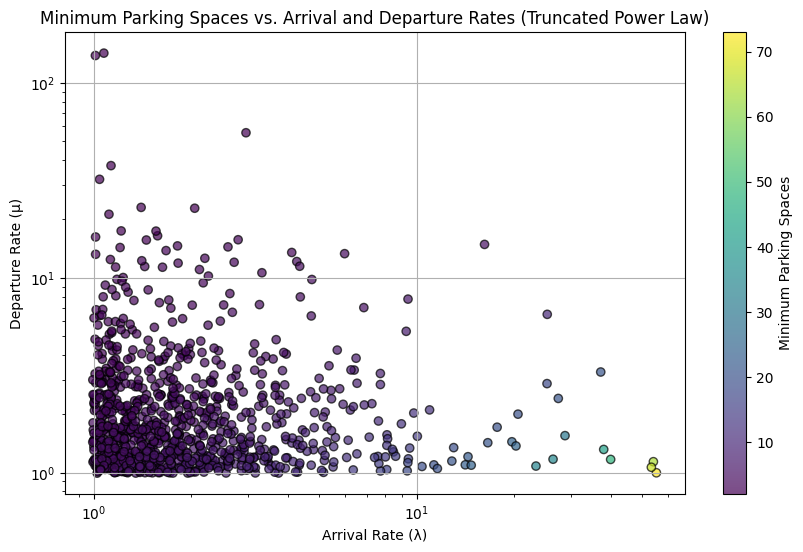

In [2]:
import numpy as np
from math import factorial, log, exp
import matplotlib.pyplot as plt


def truncated_power_law(alpha, xmin, xmax, lambda_trunc, size):
    """
    Generate random samples from a truncated power law distribution.
    Parameters:
    - alpha: Power law exponent
    - xmin: Minimum value
    - xmax: Maximum value
    - lambda_trunc: Truncation parameter
    - size: Number of samples to generate
    Returns:
    - Array of samples from the truncated power law distribution
    """

    def cdf(x):
        # Truncated CDF for normalization
        return (x ** (1 - alpha) - xmin ** (1 - alpha)) * exp(-lambda_trunc * x)

    def inverse_cdf(u):
        # Approximation of inverse CDF for generating random samples
        return ((u / exp(-lambda_trunc * xmin)) ** (1 / (1 - alpha)))

    # Generate uniform random numbers and transform using the inverse CDF
    u = np.random.uniform(0, 1, size)
    return inverse_cdf(u)


def erlang_b(lambda_rate, mu_rate, num_servers):
    '''
    Calculate the probability that all service facilities are occupied under the M/M/c/c model
    (Erlang-B formula), using logarithms for numerical stability.
    Parameters:
    - lambda_rate: arrival rate (scalar)
    - mu_rate: service rate (scalar)
    - num_servers: number of parking spaces (int)
    Returns:
    - P_full: probability of all parking spaces being occupied
    '''
    rho = lambda_rate / mu_rate  # Flow intensity
    log_rho = log(rho)  # Logarithm of rho

    # Calculate the numerator (logarithmic version)
    log_numerator = num_servers * log_rho - log_factorial(num_servers)

    # Calculate the denominator (logarithmic summation)
    log_denominator_terms = [
        k * log_rho - log_factorial(k) for k in range(num_servers + 1)
    ]
    log_denominator = log_sum_exp(log_denominator_terms)

    # Calculate P_full using the difference of logs
    log_p_full = log_numerator - log_denominator
    P_full = exp(log_p_full)  # Exponentiate back to get the final value
    return P_full


def log_factorial(n):
    '''Compute the logarithm of factorial using summation of logs.'''
    return sum(log(k) for k in range(1, n + 1))


def log_sum_exp(log_values):
    '''Compute log(sum(exp(log_values))) in a numerically stable way.'''
    max_log = max(log_values)
    return max_log + log(sum(exp(val - max_log) for val in log_values))


def find_min_parking(lambda_rate, mu_rate, target_probability):
    '''
    Find the minimum number of parking spaces required to meet the target full probability.
    Parameters:
    - lambda_rate: arrival rate (scalar)
    - mu_rate: service rate (scalar)
    - target_probability: target probability (e.g., 0.005 for 0.5%)
    Returns:
    - Minimum number of parking spaces (int)
    '''
    num_servers = 1
    while True:
        P_full = erlang_b(lambda_rate, mu_rate, num_servers)
        if P_full < target_probability:
            return num_servers
        num_servers += 1


# Parameters for truncated power law
alpha = 2.5  # Power law exponent
xmin = 1  # Minimum value
xmax = 100  # Maximum value
lambda_trunc = 0.01  # Truncation parameter
size = 1000  # Number of samples

# Generate truncated power law samples for arrival and departure rates
lambda_rate_tpl_samples = truncated_power_law(alpha, xmin, xmax, lambda_trunc, size)
mu_rate_tpl_samples = truncated_power_law(alpha, xmin, xmax, lambda_trunc, size)

# Other parameters
target_probability = 0.005  # Target: less than 0.5% probability of full parking

# Calculate the minimum number of parking spaces for each value in the distribution
parking_spaces = [
    find_min_parking(lambda_rate, mu_rate, target_probability)
    for lambda_rate, mu_rate in zip(lambda_rate_tpl_samples, mu_rate_tpl_samples)
]

print(f"Max parking spaces required: {max(parking_spaces)}")
print(f"Min parking spaces required: {min(parking_spaces)}")
print(f"Average parking spaces required: {np.mean(parking_spaces):.2f}")

# Visualization: Scatter plot of required parking spaces
plt.figure(figsize=(10, 6))
plt.scatter(lambda_rate_tpl_samples, mu_rate_tpl_samples, c=parking_spaces, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Minimum Parking Spaces')
plt.xscale('log')
plt.yscale('log')
plt.title('Minimum Parking Spaces vs. Arrival and Departure Rates (Truncated Power Law)')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Departure Rate (μ)')
plt.grid()
plt.show()